Calculating best minimal value for power law fit


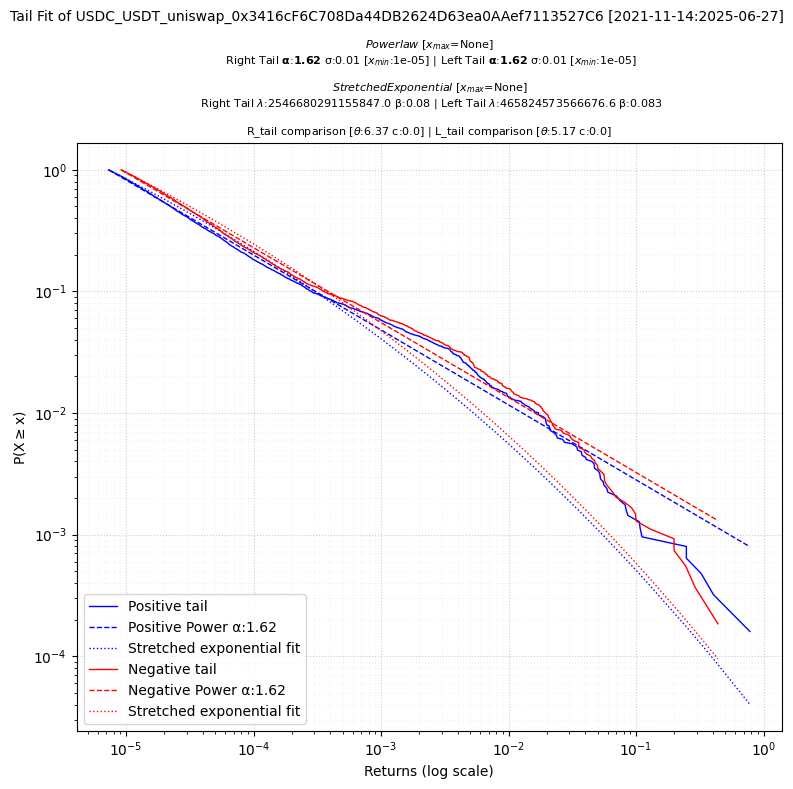

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import powerlaw

"""
Tail fit comparison for fat tails comparing stretched exponential to power law.
In all three stablecoin pools the power law is preferred with an alpha tail varying around 1.6

Stablecoin pools:
    USDC_DAI_uniswap_0x5777d92f208679DB4b9778590Fa3CAB3aC9e2168
    USDT_DAI_uniswap_0x48da0965ab2d2cbf1c17c09cfb5cbe67ad5b1406
    USDC_USDT_uniswap_0x3416cF6C708Da44DB2624D63ea0AAef7113527C6   
"""

title='USDC_USDT_uniswap_0x3416cF6C708Da44DB2624D63ea0AAef7113527C6'
df_pool = pd.read_csv('data_euler/'+title+'.csv') #link to the folder containing the pool data
df_pool['evt_block_time'] = pd.to_datetime(df_pool['evt_block_time'], utc=True)
df = df_pool
column_select='price'
df['Price'] = pd.to_numeric(df[column_select], errors='coerce')
df['Returns'] = df[column_select].pct_change(1)  # Daily percentage change
df['Date'] = df_pool['evt_block_time']

t_0=df['Date'].iloc[0].strftime('%Y-%m-%d')
t_f=df['Date'].iloc[-1].strftime('%Y-%m-%d')

t_0name=df['Date'].min()
t_fname=df['Date'].max()
       
returns=df['Returns'].dropna().replace([np.inf, -np.inf], np.nan)[1:]
    
plt.figure(figsize=(8,8))
plt.xlabel('Returns (log scale)')
plt.ylabel(r'P(X$\geq$x)')
plt.suptitle(f'Tail Fit of {title} [{t_0}:{t_f}]', fontsize=10)
plt.grid(visible=True, which='minor', axis='both', color='k', linestyle=':', alpha=0.05)
plt.grid(visible=True, axis='both', color='k', linestyle=':', alpha=0.2)

X_MIN=None #for a specific starting point for the tail select a number such as 0.01
X_MAX=None #for cut off pareto tail select a maximum

fit=powerlaw.Fit(returns[returns >= .000002], xmin_distance='D', xmin=X_MIN, xmax=X_MAX)
#fit=powerlaw.Fit(returns, xmin_distance='D', xmin=0.01)
fig1=fit.plot_ccdf(color='b', linewidth=1,label='Positive tail') 
fit.power_law.plot_ccdf(color='b', linestyle='--', linewidth=1, ax=fig1, label=f'Positive Power α:{round(fit.power_law.alpha,2)}')
fit.stretched_exponential.plot_ccdf(color='b', linestyle='dotted', ax=fig1, alpha=1, linewidth=1, label='Stretched exponential fit')

fitn=powerlaw.Fit(-returns[-returns >= .000002], xmin_distance='D', xmin=X_MIN, xmax=X_MAX)
fig1=fitn.plot_ccdf(color='r', linewidth=1,label='Negative tail')
fitn.power_law.plot_ccdf(color='r', linestyle='--', linewidth=1, ax=fig1, label=f'Negative Power α:{round(fitn.power_law.alpha,2)}')
fitn.stretched_exponential.plot_ccdf(color='r', linestyle='dotted', ax=fig1, alpha=1, linewidth=1, label='Stretched exponential fit')
plt.title(f'$Powerlaw$ ['+'$x_{max}$'+f'={fit.xmax}'
          +f']\n Right Tail '+r'$\mathbf{\alpha}$'+f':$\\bf{round(fit.power_law.alpha,2)}$ σ:{round(fit.power_law.sigma,2)}'
          +' [$x_{min}$'+f':{round(fit.xmin,5)}]'
          +f' | Left Tail '+r'$\mathbf{\alpha}$'+f':$\\bf{round(fitn.power_law.alpha,2)}$ σ:{round(fitn.power_law.sigma,2)}'
          +' [$x_{min}$'+f':{round(fitn.xmin,5)}]'
          +f'\n \n$Stretched Exponential$ ['+'$x_{max}$'+f'={fitn.xmax}'+f']\n Right Tail '+r'$\lambda$'+f':{round(fit.stretched_exponential.parameter1,2)} β:{round(fit.stretched_exponential.parameter2,2)}'
          +f' | Left Tail '+r'$\lambda$'+f':{round(fitn.stretched_exponential.parameter1,2)} β:{round(fitn.stretched_exponential.parameter2,3)}\n'+
          '\nR_tail comparison ['+r'$\theta$:'+str(round(fit.distribution_compare("power_law", "stretched_exponential", normalized_ratio=True)[0],2))
          +' c:'+str(round(fit.distribution_compare("power_law", "stretched_exponential", normalized_ratio=True)[1],3))+']'
          ' | L_tail comparison ['+r'$\theta$:'+str(round(fitn.distribution_compare("power_law", "stretched_exponential", normalized_ratio=True)[0],2))
          +' c:'+str(round(fitn.distribution_compare("power_law", "stretched_exponential", normalized_ratio=True)[1],3))+']'
          ,fontsize=8)
plt.legend(loc="lower left")
plt.tight_layout()
#plt.xlim(0,1.25)
#plt.ylim(10**-4.8,2)
plt.show()